In [2]:
# mathematical operations-linear Algebra
import numpy as np

# dataframe
import pandas as pd

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from sklearn.metrics import f1_score, accuracy_score

# TensorFlow and Keras
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM
from tensorflow.keras import utils
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# ignore warnings
import warnings
warnings.filterwarnings(action='ignore')

# Matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
import seaborn as sns

# NLTK
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
nltk.download('omw-1.4')

# Word2vec
import gensim
from gensim.test.utils import common_texts
from gensim.models import Word2Vec

# Utility
import string
import re
import numpy as np
import os
from collections import Counter
import logging
import time
import pickle
import itertools
import random
import datetime

# WordCloud
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter, defaultdict

import os
for dirname, _, filenames in os.walk("D:\AI sem2\Twitter_Data.csv"):
    for filename in filenames:
        print(os.path.join(dirname, filename))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [5]:
import pandas as pd
import os

# Use raw string for the file path
file_path = "/content/Twitter_Data.csv"

# Check if the file exists
if os.path.exists(file_path):
    df = pd.read_csv(file_path)
    print("File loaded successfully")
else:
    print("File not found. Please check the file path.")


File loaded successfully


In [6]:
df.head(5)

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


# **Data Pre-processing**

In [7]:
# Checking information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


In [8]:
# Check for missing values
df.isnull().sum()

clean_text    4
category      7
dtype: int64

In [9]:
# Fill missing values in the 'clean_text' column with empty strings
df['clean_text'].fillna('', inplace=True)

In [10]:
# Confirming the changes
df.isnull().sum()

clean_text    0
category      7
dtype: int64

In [11]:
# Remove duplicates
df.drop_duplicates(inplace=True)

# **Word Cloud Analysis**

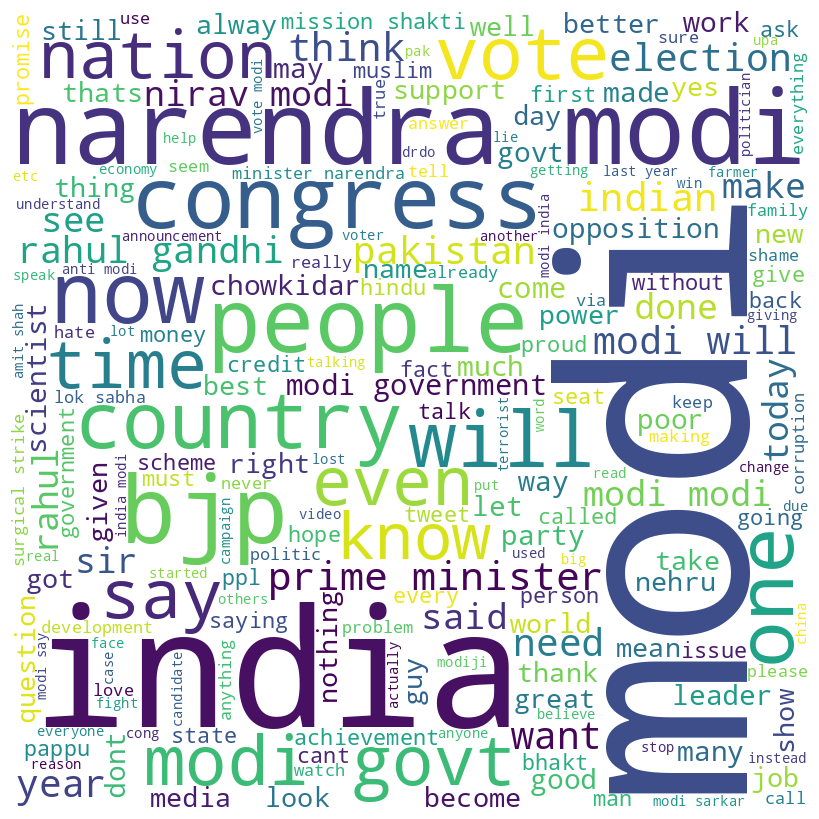

In [12]:
# Convert all tweets to a single string
all_tweets = ' '.join(df['clean_text'])

# Generate WordCloud
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = set(STOPWORDS),
                min_font_size = 10).generate(all_tweets)

# Plot WordCloud
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

# **Word2Vec Analysis**

In [13]:
# Tokenize words
tokenized_text = [word_tokenize(text.lower()) for text in df['clean_text']]

# Word2Vec model
model = Word2Vec(tokenized_text, vector_size=100, window=5, min_count=1, workers=4)

# Most similar words
similar_words = model.wv.most_similar('happy', topn=5)
print(similar_words)

[('unhappy', 0.7062035202980042), ('disappointed', 0.6835559010505676), ('proud', 0.6386045813560486), ('angry', 0.6345497369766235), ('lucky', 0.629377543926239)]


# **Sentiment Analysis using Deep-Learning Model--LSTM**

In [14]:
# Define input and target variables
X = df['clean_text']
y = df['category']

In [15]:
# Encode target variable
encoder = LabelEncoder()
y = encoder.fit_transform(y)
y = utils.to_categorical(y)

In [17]:
# Assume y is your target variable before encoding
# Ensure y is 1-dimensional
if y.ndim > 1:
    y = y.flatten()

# Encode target variable
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Convert encoded labels to categorical
y_categorical = utils.to_categorical(y_encoded)

print("Encoding successful")


Encoding successful


In [18]:
# Tokenize text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
sequences = tokenizer.texts_to_sequences(X)

In [19]:
# Vocabulary size
vocab_size = len(tokenizer.word_index) + 1

In [20]:
# Max sequence length
max_seq_length = max([len(seq) for seq in sequences])

In [21]:
# Pad sequences
X_pad = pad_sequences(sequences, maxlen=max_seq_length)

In [24]:
# Ensure y has the same number of samples as X_pad
y = y[:X_pad.shape[0]]

# Encode target variable
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Convert encoded labels to categorical
y_categorical = utils.to_categorical(y_encoded)

# Print the shapes again to ensure consistency
print(f"Shape of X_pad: {X_pad.shape}")
print(f"Shape of y_categorical: {y_categorical.shape}")

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_pad, y_categorical, test_size=0.2, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")


Shape of X_pad: (162979, 52)
Shape of y_categorical: (162979, 2)
Shape of X_train: (130383, 52)
Shape of X_test: (32596, 52)
Shape of y_train: (130383, 2)
Shape of y_test: (32596, 2)


In [25]:
# Define LSTM model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=100, input_shape=(max_seq_length,)))
model.add(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(units=3, activation='softmax'))

In [26]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [27]:
# Model summary
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 52, 100)           11368000  
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 3)                 387       
                                                                 
Total params: 11485635 (43.81 MB)
Trainable params: 11485635 (43.81 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None




* The first column lists the types of layers in the model (Embedding, LSTM, Dense).
*   The second column shows the output shape of each layer. For the Embedding layer, (None, 52, 100) indicates that the output shape is (batch_size, input_length, output_dim), where batch_size is None because it can vary, input_length is 52, and output_dim is 100. For the LSTM layer, (None, 128) indicates that the output shape is (batch_size, units) where units is 128. For the Dense layer, (None, 3) indicates that the output shape is (batch_size, number_of_classes), where number_of_classes is 3 in this case.

*  The third column shows the number of parameters in each layer. For the Embedding layer, it has 11,367,900 parameters, which is calculated as vocab_size * output_dim. For the LSTM layer, it has 117,248 parameters, and for the Dense layer, it has 387 parameters.
*   The summary also provides information about the total number of parameters in the model (Total params) and the number of trainable parameters (Trainable params). In this case, all parameters are trainable.





In [28]:
# Define callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.001)
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [32]:
# Ensure y has the same number of samples as X_pad
y = y[:X_pad.shape[0]]

# Encode target variable
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Convert encoded labels to categorical
y_categorical = utils.to_categorical(y_encoded)

# Print the shapes again to ensure consistency
print(f"Shape of X_pad: {X_pad.shape}")
print(f"Shape of y_categorical: {y_categorical.shape}")

# Train-test split with a smaller subset of data
X_train, X_test, y_train, y_test = train_test_split(X_pad[:10000], y_categorical[:10000], test_size=0.2, random_state=42)

# Check the maximum value in X_train to ensure it is within the range of input_dim
max_value_in_X_train = np.max(X_train)
print(f"Maximum value in X_train: {max_value_in_X_train}")

# Define input_dim based on the maximum value in X_train
input_dim = max_value_in_X_train + 1  # Add 1 because input_dim should be the max index + 1

# Simplified model architecture
model = Sequential()
model.add(Embedding(input_dim=input_dim, output_dim=64, input_length=X_train.shape[1]))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.001)
early_stop = EarlyStopping(monitor='val_loss', patience=3)

# Train the model with fewer epochs
history = model.fit(X_train, y_train, batch_size=128, epochs=5, validation_split=0.1, callbacks=[reduce_lr, early_stop])

print("Model training complete")


Shape of X_pad: (162979, 52)
Shape of y_categorical: (162979, 2)
Maximum value in X_train: 46836
Epoch 1/5
57/57 [==============================] - 6s 64ms/step - loss: 0.5829 - accuracy: 0.7428 - val_loss: 0.5592 - val_accuracy: 0.7588 - lr: 0.0010
Epoch 2/5
57/57 [==============================] - 4s 70ms/step - loss: 0.5408 - accuracy: 0.7492 - val_loss: 0.5595 - val_accuracy: 0.7588 - lr: 0.0010
Epoch 3/5
57/57 [==============================] - 3s 61ms/step - loss: 0.4059 - accuracy: 0.7842 - val_loss: 0.6017 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 4/5
57/57 [==============================] - 4s 68ms/step - loss: 0.1881 - accuracy: 0.9388 - val_loss: 0.7490 - val_accuracy: 0.6875 - lr: 0.0010
Model training complete


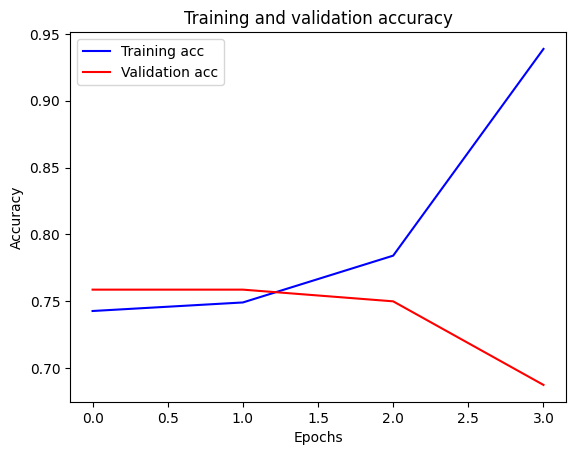

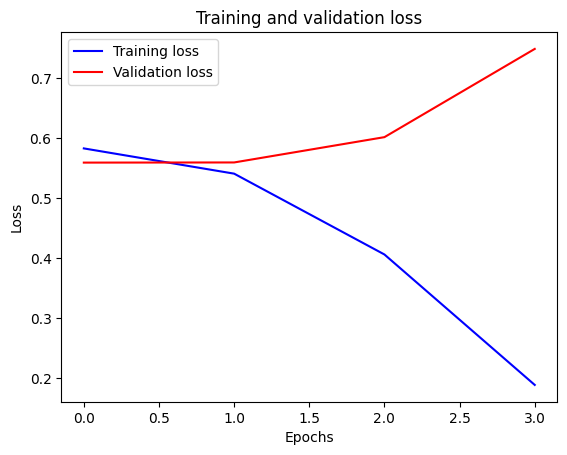

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

# Plot training and validation accuracy
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()

# Plot training and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# **Model Prediction**

In [34]:
# Make predictions on the test data
predictions = model.predict(X_test)

# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Convert one-hot encoded labels to original labels
true_labels = np.argmax(y_test, axis=1)

# Print some examples of predicted and true labels
print("Examples of Predictions vs True Labels:")
for i in range(5):
    print("Predicted:", predicted_labels[i], "True:", true_labels[i])

63/63 [==============================] - 0s 2ms/step
Examples of Predictions vs True Labels:
Predicted: 0 True: 1
Predicted: 0 True: 0
Predicted: 0 True: 0
Predicted: 1 True: 1
Predicted: 0 True: 1


# **Test our Model**

In [36]:
# Define a function to classify sentiment
def classify_sentiment(text):
    # Preprocess the text (tokenization, padding, etc.)
    text_sequence = tokenizer.texts_to_sequences([text])
    padded_sequence = pad_sequences(text_sequence, maxlen=max_seq_length)

    # Make prediction using the trained model
    prediction = model.predict(padded_sequence)

    # Convert prediction to class label
    predicted_label = np.argmax(prediction)

    # Map class label to sentiment
    sentiment_mapping = {0: "Negative", 1: "Neutral", 2: "Positive"}
    sentiment = sentiment_mapping[predicted_label]

    return sentiment

# Test the function with some sentences
sentences = [
    "I love this movie, it's amazing!",
    "The weather today is beautiful.",
    "I feel happy when I'm with my friends.",
    "The food at this restaurant is delicious.",
    "I'm excited about the new project at work.",
    "I'm not sure if I like the new design.",
    "I'm feeling a bit down today.",
    "This book is boring, I couldn't finish it.",
    "The customer service was terrible, I won't go back.",
    "I'm so angry right now!",
    "I'm indifferent about the outcome of the game.",
    "The traffic was horrible this morning.",
    "I'm grateful for all the help you've given me.",
    "I'm feeling anxious about the presentation tomorrow.",
    "The movie was okay, nothing special.",
]

print("Sentences and Predicted Sentiments:")
for sentence in sentences:
    sentiment = classify_sentiment(sentence)
    print("Sentence:", sentence)
    print("Predicted Sentiment:", sentiment)
    print()


Sentences and Predicted Sentiments:
1/1 [==============================] - 0s 24ms/step
Sentence: I love this movie, it's amazing!
Predicted Sentiment: Negative

1/1 [==============================] - 0s 23ms/step
Sentence: The weather today is beautiful.
Predicted Sentiment: Negative

1/1 [==============================] - 0s 24ms/step
Sentence: I feel happy when I'm with my friends.
Predicted Sentiment: Negative

1/1 [==============================] - 0s 29ms/step
Sentence: The food at this restaurant is delicious.
Predicted Sentiment: Negative

1/1 [==============================] - 0s 22ms/step
Sentence: I'm excited about the new project at work.
Predicted Sentiment: Negative

1/1 [==============================] - 0s 29ms/step
Sentence: I'm not sure if I like the new design.
Predicted Sentiment: Negative

1/1 [==============================] - 0s 25ms/step
Sentence: I'm feeling a bit down today.
Predicted Sentiment: Negative

1/1 [==============================] - 0s 24ms/step
Sen

# **Confusion Matrix**

63/63 [==============================] - 1s 9ms/step


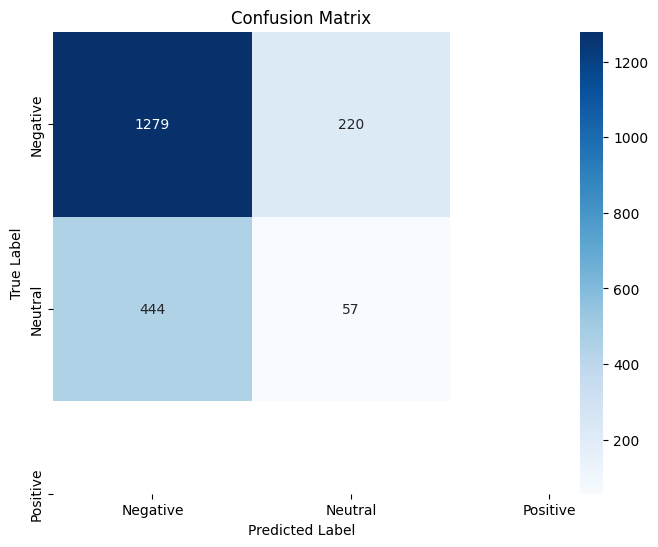

In [37]:
# Make predictions on the entire test set
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

# Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# **classification report**

In [39]:
from sklearn.metrics import classification_report

# Assuming true_labels and predicted_labels are your actual and predicted labels
# Check the unique classes in the labels
unique_classes = np.unique(true_labels)
print(f"Unique classes in true labels: {unique_classes}")

# Adjust target names based on the unique classes
if len(unique_classes) == 2:
    target_names = ['Negative', 'Positive']  # or ['Class 0', 'Class 1'] based on your classes
else:
    target_names = ['Negative', 'Neutral', 'Positive']

# Classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels, target_names=target_names))


Unique classes in true labels: [0 1]
Classification Report:
              precision    recall  f1-score   support

    Negative       0.74      0.85      0.79      1499
    Positive       0.21      0.11      0.15       501

    accuracy                           0.67      2000
   macro avg       0.47      0.48      0.47      2000
weighted avg       0.61      0.67      0.63      2000

